In [1]:
import seaborn as sn
import pandas as pd
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mydb = mysql.connector.connect(
  host="localhost",
  user='root',
  password='root',
  database="dmdw"
)

# Data analysis by date of complete data base

In [3]:
df =pd.DataFrame([], columns = ['Date','Count'])

In [4]:
mycursor = mydb.cursor()
mycursor.execute("""
select distinct(date_format(date(issu_date),'%y/%m/%d %h')),count(*) from 
ticket where year(issu_date) = 2022 and month(issu_date) > 4 group by date_format(date(issu_date),'%y/%m/%d %h');""")
myresult = mycursor.fetchall()

In [5]:
def add_to_data(arr):
    df.loc[len(df)] = arr

In [6]:
for i in range(0,len(myresult)):
    add_to_data(np.asarray(myresult[i]))

In [7]:
#df['Date'] = pd.to_datetime(df['Date'])
df["Date"] = df["Date"].astype("str") 
df['Count'] = df['Count'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 103
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    104 non-null    object
 1   Count   104 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 2.0+ KB


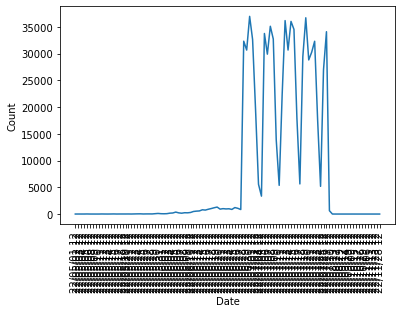

In [8]:
a = sn.lineplot(data=df, x='Date', y='Count')
a.tick_params(axis='x', rotation=90)

# Data analysis by hour between 01/07/2022 to 30/07/2022

In [9]:
mycursor = mydb.cursor()
mycursor.execute(""" select DATE_FORMAT(issu_date, '%y/%m/%d'),hour(issu_date), count(*) from ticket where year(issu_date) = 2022 and month(issu_date) = 7 group by date(issu_date),hour(issu_date) 
""")
myresult = mycursor.fetchall()

In [10]:
df =pd.DataFrame([], columns = ['Date','Count'])

In [11]:
for i in range(0,len(myresult)):
    if len(str(myresult[i][1])) == 1:
        time = "0" + str(myresult[i][1])
    else :
        time = str(myresult[i][1])
    df.loc[len(df)] = np.asarray([str(myresult[i][0]) + " " +time+":00:00",myresult[i][2]])

In [12]:
df["Date"] = df["Date"].astype("str") 
df['Count'] = df['Count'].astype(int)

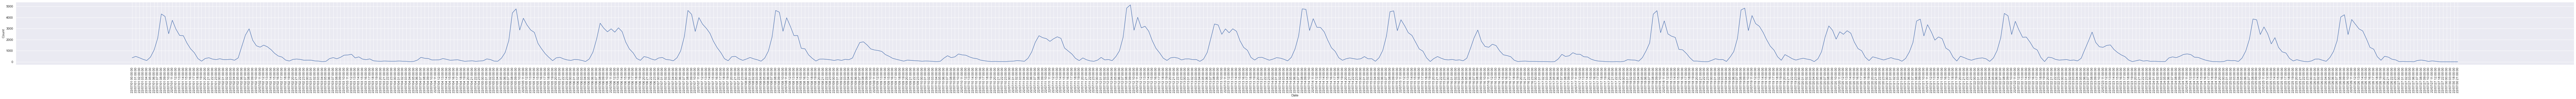

In [13]:
sn.set(rc={"figure.figsize":(8*20, 4)})
a = sn.lineplot(data=df, x='Date', y='Count')
a.tick_params(axis='x', rotation=90)

In [15]:
df.to_csv('ticket data.csv')

# Z-Score

In [54]:
df = pd.read_csv('ticket data.csv',index_col = 0)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 0 to 636
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    637 non-null    object
 1   Count   637 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.9+ KB


In [56]:
standard_deviation = df['Count'].std()
mean = df['Count'].mean()

In [57]:
df['Z_Score'] = (df['Count'] - mean)/standard_deviation

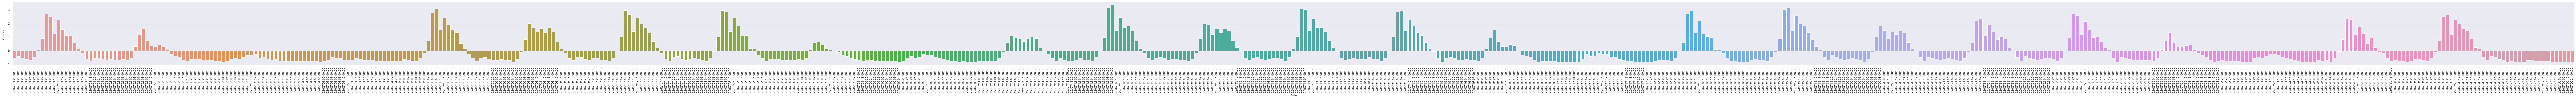

In [59]:
sn.set(rc={"figure.figsize":(8*20, 4)})
a = sn.barplot(data=df, x='Date', y='Z_Score')
a.tick_params(axis='x', rotation=90)